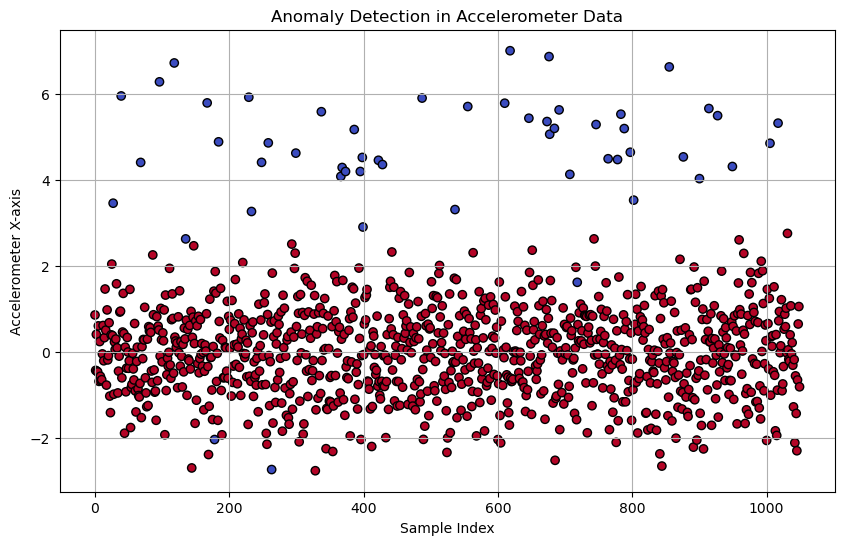

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Function to generate synthetic sensor data with some anomalies
def generate_sensor_data(samples=1000):
    normal_data = np.random.normal(loc=0.0, scale=1.0, size=(samples, 3))
    anomaly_data = np.random.normal(loc=5.0, scale=1.0, size=(int(samples * 0.05), 3))
    data = np.vstack([normal_data, anomaly_data])
    np.random.shuffle(data)
    return pd.DataFrame(data, columns=['acc_x', 'strain', 'temp'])

# Generate the data
sensor_df = generate_sensor_data()

# Scale the data to [0, 1] range
scaler = MinMaxScaler()
sensor_df_scaled = scaler.fit_transform(sensor_df)

# Train Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(sensor_df_scaled)

# Predict anomalies (-1 for anomaly, 1 for normal)
preds = model.predict(sensor_df_scaled)

# Add predictions to the dataframe
sensor_df['anomaly'] = preds

# Plot anomalies in accelerometer data
plt.figure(figsize=(10, 6))
plt.scatter(sensor_df.index, sensor_df['acc_x'], c=sensor_df['anomaly'], cmap='coolwarm', edgecolor='k')
plt.title('Anomaly Detection in Accelerometer Data')
plt.xlabel('Sample Index')
plt.ylabel('Accelerometer X-axis')
plt.grid(True)
plt.show()
